In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
def deriv_I(d,alpha):
    beta = 0.5 
    Io = 100*(1-(beta+0.1))
    return -(Io*np.exp(-d/alpha))/alpha

def deriv_Ah(depth,h):
    A_max = 1e-2
    A_depth = 1e-4
    A_dip = 1.5e-3
    if depth < h:
        return A_max
    else:
        return  A_depth + (A_max-A_depth-A_dip*(depth-h))*np.exp(-0.5*(depth-h))
    #return A_depth + (A_max-A_depth-A_dip*(depth-h))*np.exp(-0.5*(depth-h))
    
def n_matrix(N,h):
    A_max = 1e-2
    A = np.zeros(shape=(N+1,N+1))
    #T = np.zeros(N+1).reshape((N+1),1)
    #F = np.zeros(N+1).reshape((N+1),1)
    
    #cdiff_coeff = [1.,-2,1.] #central diff approx
    #fdiff_coeff = [1,-1] #forward euler approx

    
    for i in range(1,N):
        z1 = deriv_Ah(i-0.5,h) 
        z2 = (deriv_Ah(i+0.5,h) + deriv_Ah(i-0.5,h))
        z3 = deriv_Ah(i+0.5,h) 
        #if i <= h:
        #    A[i,i-1:3+(i-1)] = [A_max,-2*A_max,A_max]
        #elif i >h:
        #    A[i,i-1:3+(i-1)] = [z1,z2,z3]
        A[i,i-1:3+(i-1)] = [z1,-z2,z3]
    return A 


In [9]:
deriv_I(0,10)

-4.0

In [10]:
# upper mixing layer
# try putting both with a stencil change after h = 10 
N = 200
h = 10
A = n_matrix(N,h)

# Setting up initial conditions
A[0,0] = 1 
A[-1,-1] = 1 

np.set_printoptions(linewidth=100)
A

array([[ 1.e+00,  0.e+00,  0.e+00, ...,  0.e+00,  0.e+00,  0.e+00],
       [ 1.e-02, -2.e-02,  1.e-02, ...,  0.e+00,  0.e+00,  0.e+00],
       [ 0.e+00,  1.e-02, -2.e-02, ...,  0.e+00,  0.e+00,  0.e+00],
       ...,
       [ 0.e+00,  0.e+00,  0.e+00, ..., -2.e-04,  1.e-04,  0.e+00],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  1.e-04, -2.e-04,  1.e-04],
       [ 0.e+00,  0.e+00,  0.e+00, ...,  0.e+00,  0.e+00,  1.e+00]])

In [11]:
np.linalg.cond(A)

35826502.626092196

In [12]:
alpha = 10
cp = 4e6

T = np.zeros(N+1).reshape((N+1),1)
F = np.zeros(N+1).reshape((N+1),1)
F[0] = -1 
F[-1] = -2

for d in range(1,N):
    #if d < h:
        # f = (deriv_I(d,alpha)/(cp*deriv_Ah(d,h)))*d**2
        # f = 1/cp * deriv_I(d,alpha)
    #elif d>=h:
        # f = (deriv_I(d,alpha)/(cp*deriv_Ah(d,h)))*d
    F[d] = (1/cp * deriv_I(d,alpha))
    

In [13]:
T = np.linalg.solve(A,F)
len(T[:,0])
depth = np.arange(len(T[:,0]))
T[-1]

array([-2.])

(200.0, 0.0)

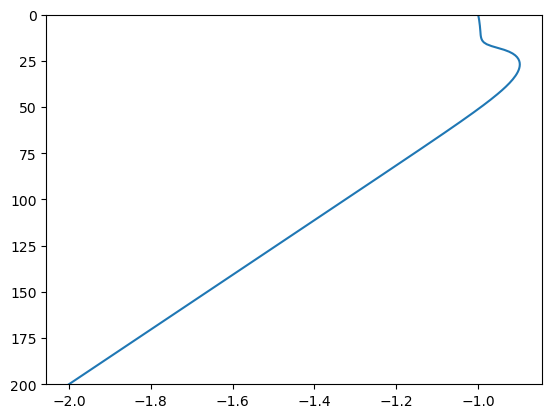

In [14]:
plt.plot(T,depth)
plt.ylim(200,0)
#plt.xlim(-3,1)

# part 1